In [126]:
import pandas as pd
import pickle
import imblearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [127]:
class DataframeContainer:
    def __init__(self, name, filanemCsv):
        self.name = name
        self.dataframe = pd.read_csv(filanemCsv, sep=';')
        self.dataframe = self.dataframe[self.dataframe['Text'] != """"""]
        
    def filter_dataframe(self):
        count = 0
        for ind, row in self.dataframe.iterrows():
            if row['Text'] == """""":
                print("empty")
                continue
            if self.name != str(row['Label']):
                count += 1
                row['Label'] = 'Other'
                row['Text'] = row['Text'].replace('\n', ' ').replace(',', ' ').lower()
        print(f'{self.name} filtered {count} rows')  
        
    def separate_x_y(self):
        self.df_X, self.df_y = self.dataframe['Text'], self.dataframe['Label']
        unique, counts = np.unique(self.df_y , return_counts=True)
        plt.bar(unique, counts, 1)
        plt.title('Class Frequency')
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.show()

    def predict(self):
        self.y_pred = self.clf.predict(self.df_X)

    def confusion_matrix(self):
        y_unique = self.df_y.unique()
        cm = confusion_matrix(self.df_y, self.y_pred, labels=y_unique)
        cm_df = pd.DataFrame(cm, index = [y_unique], columns = [y_unique])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True, fmt='d')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        plt.show()
        print(f"Accuracy {self.name} : {metrics.accuracy_score(self.df_y, self.y_pred)}")
    
    def save_pickle(self):
        filename = self.name + '.sav'
        pickle.dump(self.clf, open(filename, 'wb'))
    def load_pickle(self):
        filename = 'pickles/3/' + self.name + '.sav'
        self.clf = pickle.load(open(filename, 'rb'))

Audio filtered 2314 rows


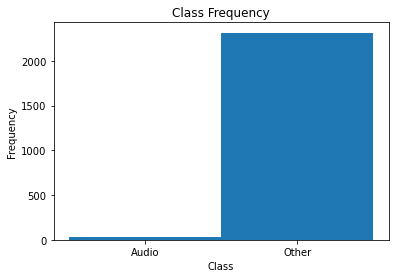

Computer Vision filtered 1318 rows


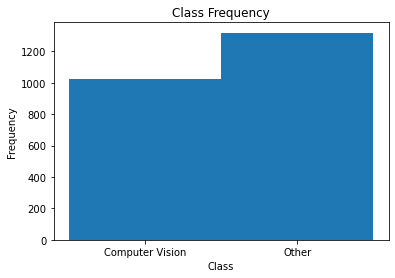

Graphs filtered 2286 rows


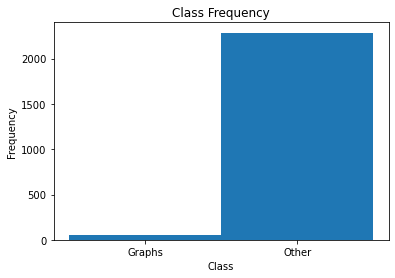

Natural Language Processing filtered 2111 rows


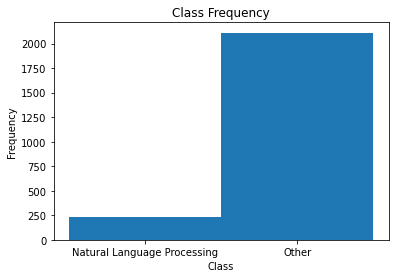

Reinforcement Learning filtered 2205 rows


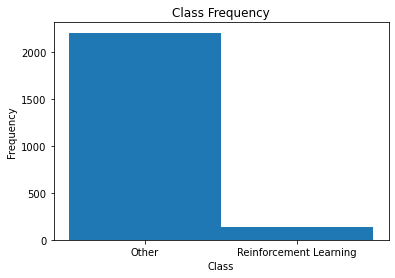

Sequential filtered 2271 rows


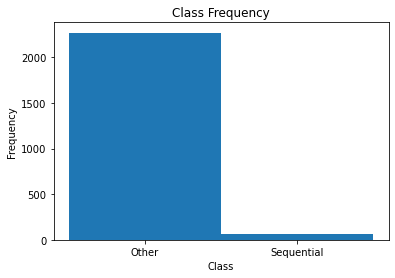

In [128]:
names_list = ["Audio", "Computer Vision", "Graphs", "Natural Language Processing", "Reinforcement Learning", "Sequential"]
dataframecontainers_list = [DataframeContainer(name, 'dataset/somef_data.csv') for name in names_list]
for container in dataframecontainers_list:
    container.load_pickle()
    container.filter_dataframe()
    container.separate_x_y()

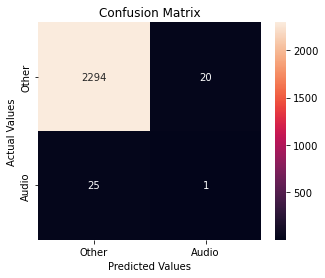

Accuracy Audio : 0.9807692307692307


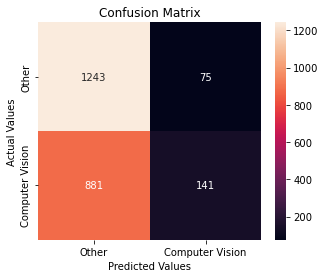

Accuracy Computer Vision : 0.5914529914529915


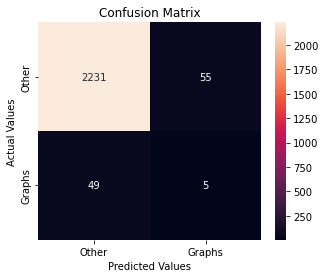

Accuracy Graphs : 0.9555555555555556


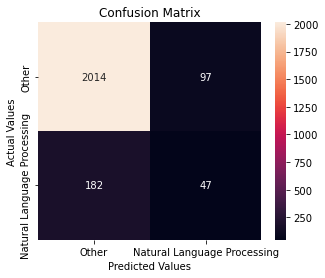

Accuracy Natural Language Processing : 0.8807692307692307


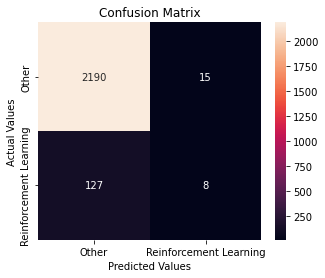

Accuracy Reinforcement Learning : 0.9393162393162393


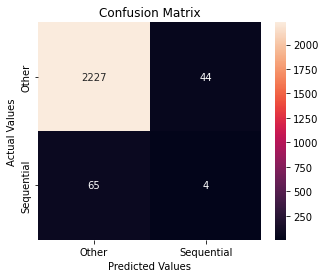

Accuracy Sequential : 0.9534188034188035


In [129]:
for container in dataframecontainers_list:
    container.predict()
    container.confusion_matrix()

#Pickles/1
#Accuracy Audio : 0.9807692307692307
#Accuracy Computer Vision : 0.5914529914529915
#Accuracy General : 0.4388888888888889
#Accuracy Graphs : 0.9555555555555556
#Accuracy Natural Language Processing : 0.8807692307692307
#Accuracy Reinforcement Learning : 0.9393162393162393
#Accuracy Sequential : 0.9534188034188035



Computer Vision filtered 3 rows


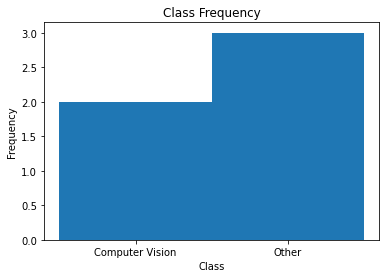

Natural Language Processing filtered 4 rows


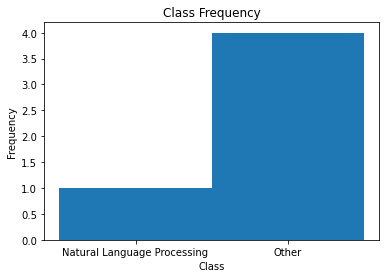

In [130]:
names_list = ["Computer Vision", "Natural Language Processing"]
dataframecontainers_list = [DataframeContainer(name, 'dataset/free_text.csv') for name in names_list]
for container in dataframecontainers_list:
    container.load_pickle()
    container.filter_dataframe()
    container.separate_x_y()

['Other', 'Computer Vision', 'Computer Vision', 'Other', 'Other']
['Other' 'Computer Vision' 'Other' 'Other' 'Other']


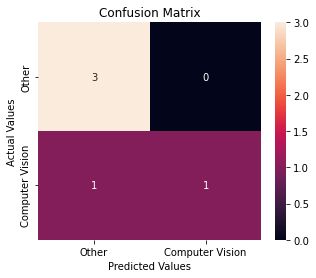

Accuracy Computer Vision : 0.8
['Other', 'Other', 'Other', 'Natural Language Processing', 'Other']
['Other' 'Other' 'Other' 'Other' 'Other']


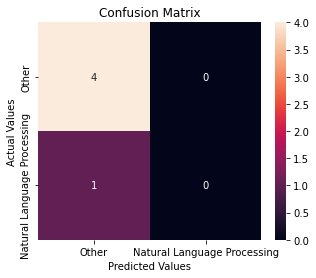

Accuracy Natural Language Processing : 0.8


In [131]:
for container in dataframecontainers_list:
    container.predict()
    print(container.df_y.values.tolist())
    print(container.y_pred)
    container.confusion_matrix()